<h1 align="center">Mathematical Methods in Engineering - Course Code: 25872</h1>
<h4 align="center">Instructor: Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Computer Assignment 2</h4>
<h4 align="center">

Questions 1, 2: [Ali Yousefi](https://t.me/BeNameBalasari), Questions 3, 4: [Mahshad Moradi](https://t.me/maahmoradi)

</h4>

## Question 1 ``(30 pt.)``
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

In [12]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt

dataset = pd.read_csv('arac.csv',sep=';')
BaseYear = 1966

In [13]:
x = np.matrix(dataset.Year[0:]).T - BaseYear
cars = np.matrix(dataset.Car[0:]).T
buses = np.matrix(dataset.Bus[0:]).T

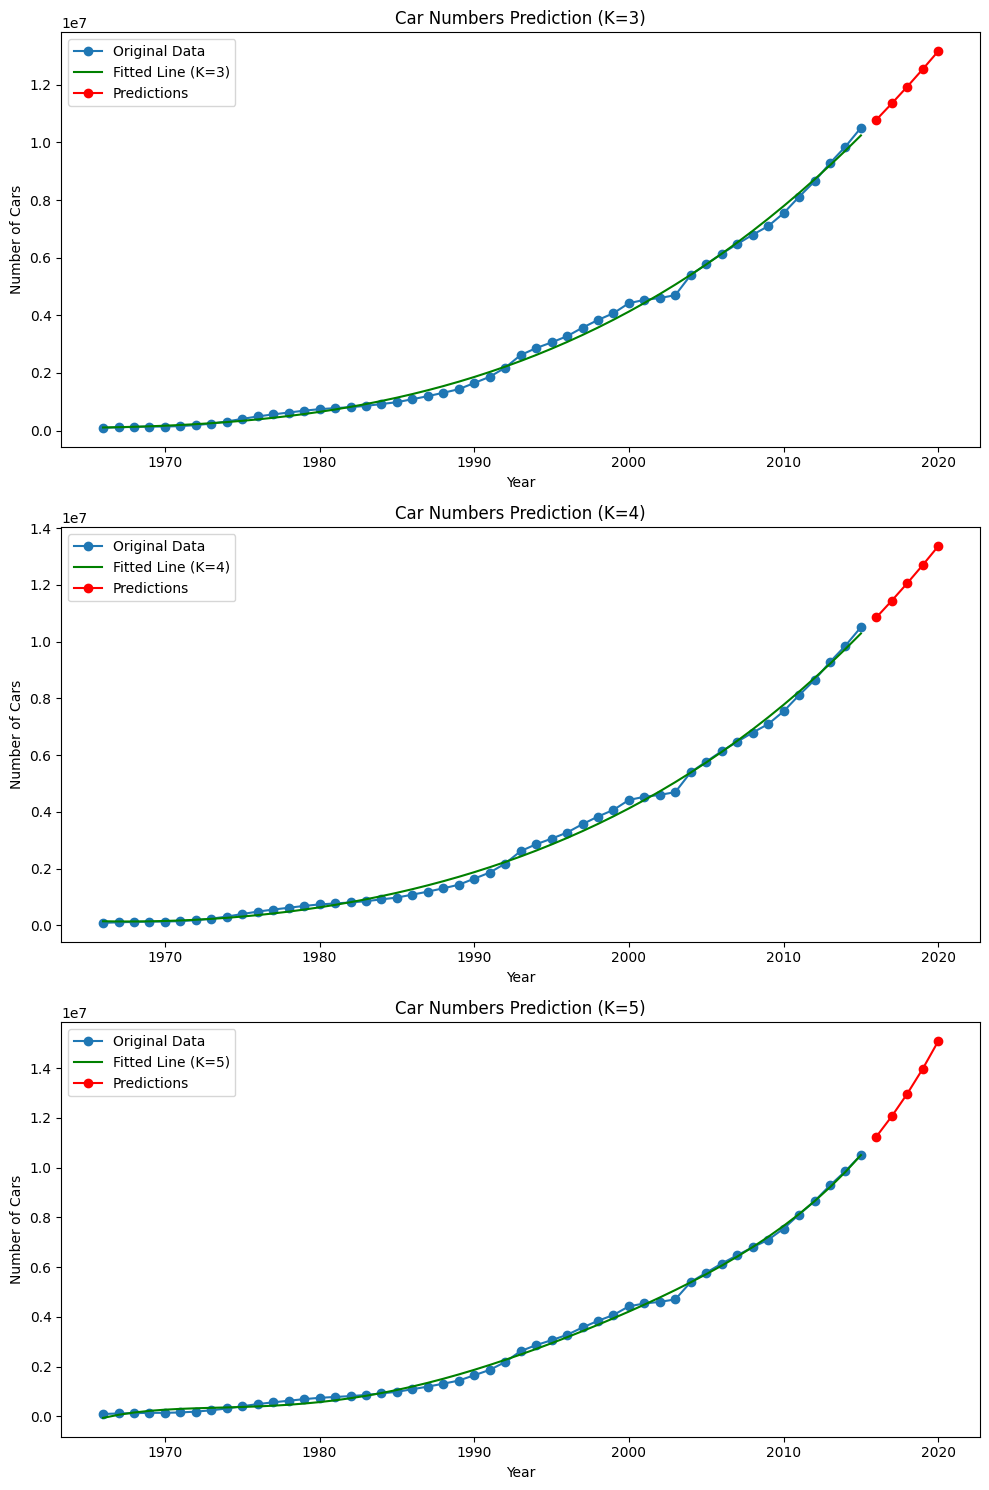

In [14]:
TargetYears = np.matrix([2016, 2017, 2018, 2019, 2020]).T - BaseYear
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for i, K in enumerate([3, 4, 5]):
    A = np.hstack([np.power(x, j) for j in range(K + 1)])
    W = np.linalg.lstsq(A, cars, rcond=None)[0]
    f = A * W
    A2 = np.hstack([np.power(TargetYears, j) for j in range(K + 1)])
    f2 = A2 * W
    axs[i].plot(x + BaseYear, cars, 'o-', label='Original Data')
    axs[i].plot(x + BaseYear, f, 'g', label=f'Fitted Line (K={K})')
    axs[i].plot(TargetYears + BaseYear, f2, 'ro-', label='Predictions')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Number of Cars')
    axs[i].set_title(f'Car Numbers Prediction (K={K})')
    axs[i].legend()
plt.tight_layout()
plt.show()

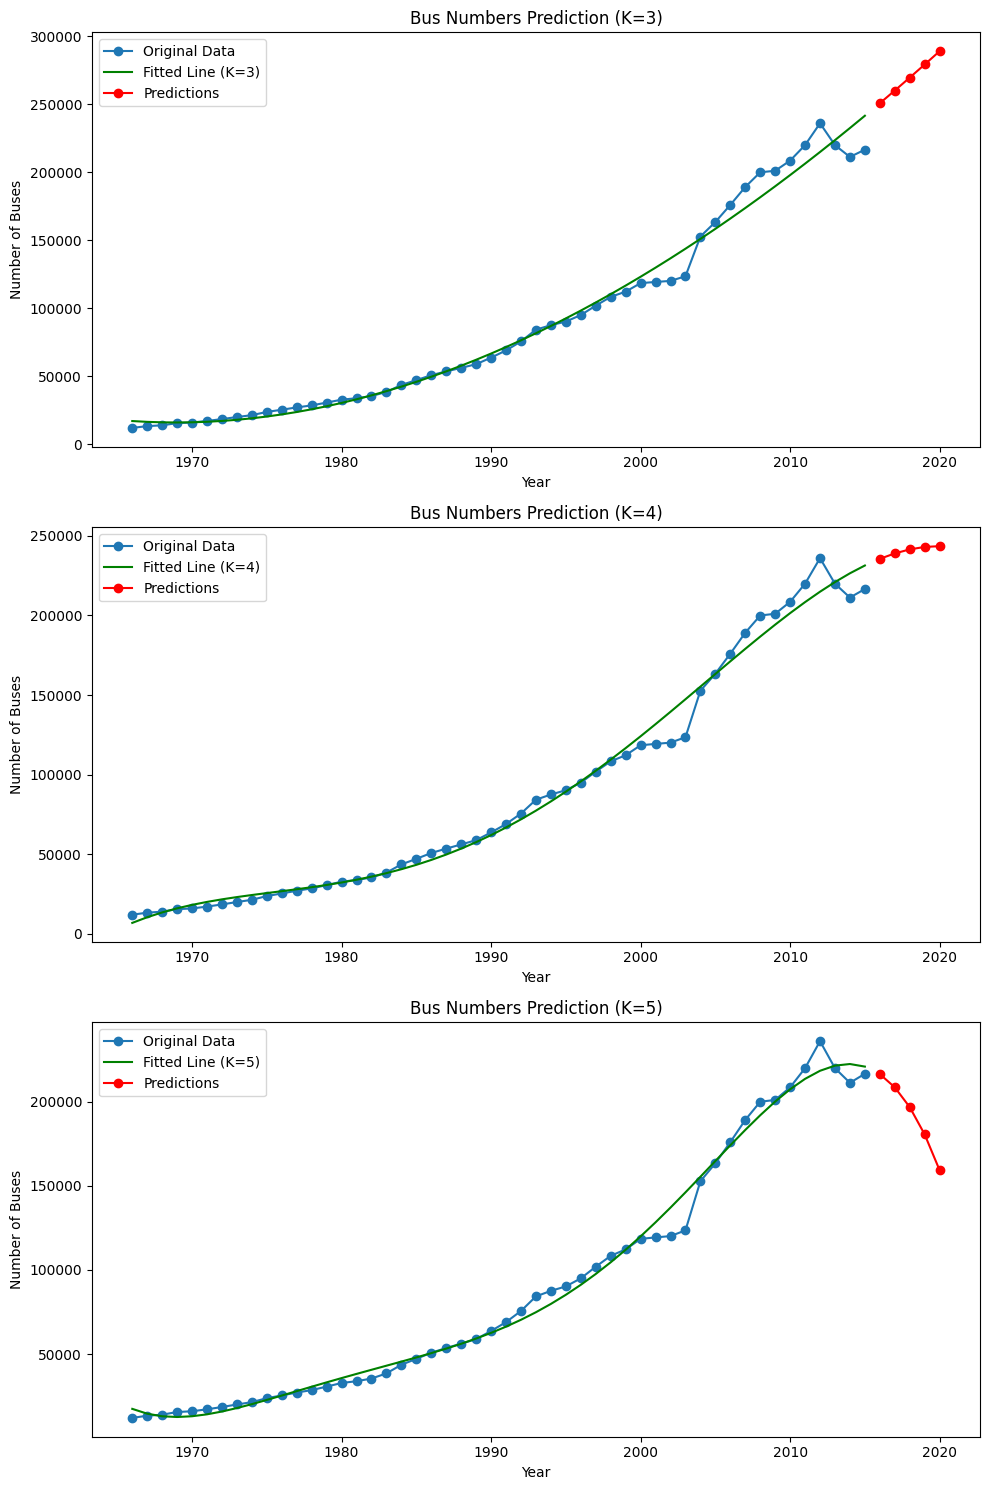

In [16]:
TargetYears = np.matrix([2016, 2017, 2018, 2019, 2020]).T - BaseYear
fig, axs = plt.subplots(3, 1, figsize=(10, 15))
for i, K in enumerate([3, 4, 5]):
    A = np.hstack([np.power(x, j) for j in range(K + 1)])
    W = np.linalg.lstsq(A, buses, rcond=None)[0]
    f = A * W
    A2 = np.hstack([np.power(TargetYears, j) for j in range(K + 1)])
    f2 = A2 * W
    axs[i].plot(x + BaseYear, buses, 'o-', label='Original Data')
    axs[i].plot(x + BaseYear, f, 'g', label=f'Fitted Line (K={K})')
    axs[i].plot(TargetYears + BaseYear, f2, 'ro-', label='Predictions')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Number of Buses')
    axs[i].set_title(f'Bus Numbers Prediction (K={K})')
    axs[i].legend()
plt.tight_layout()
plt.show()

## Question 2 ``(30 pt.)``

As you learned in the course, the least squares method is a way of estimating a function given sample points $$(x_i, y_i), \quad  0 \leq i \leq n$$ with the assumption of linearity of the underlying function.
### step 1
Create n=10 sample points $(x_i, y_i)$ where $$y_i = 2x_i + 3 + \epsilon_i$$ $\epsilon_i$ is an error term (measurement error etc.) added to $y_i$ and is modeled by random variables: $\epsilon_i \stackrel{iid}{\sim} \mathcal{N}(0, 1) $  . The x's should range from 0 to 5 and be evenly spaced (hint: use numpy's linspace function)
### step 2
Given the samples of the previous part, try to estimate a linear function that models the relationship between $x_i$'s and $y_i$'s using the least squares method (find a and b such that the error function $\sum_{i=0}^{n-1} ||ax_i + b - y_i||^2$ is minimized)
### step 3
Plot the sample points and the line you estimated in the previous part in the same graph using matplotlib.
### step 4
Plot the error function $\sum_{i=0}^{n-1} ||ax_i + b - y_i||^2$ as a function of n where $10\leq n \leq 50$ and a and b are the least squares estimates of the line $ax + b = y$.
### step 5
Repeat part 1 but this time create n=20 sample points with a quadratic term added to y: $$y_i = x^2_i + 2x_i + 3 + \epsilon_i$$ $\epsilon_i$ has the same distribution as before and x's range from 0 to 5 likewise.
### step 6
Try to use the least squares method to estimate the coefficients of the quadratic function given the sample points of part 5 (hint: in the least squares method we minimze the norm of the error vector $||Ax-y||^2$. Add a column to matrix A for the quadratic terms and then try to minimize the error function using the least squares method).
### step 7
Repeat part 3 for the estimated quadratic function of the previous part.

In [17]:
import numpy as np
import matplotlib.pyplot as plt

### step 1

In [18]:
np.random.seed(0)
x = np.linspace(0, 5, num=10)
epsilon = np.random.normal(0, 1, 10)
y = 2 * x + 3 + epsilon

### step 2

In [19]:
a, b = np.polyfit(x, y, 1)

### step 3

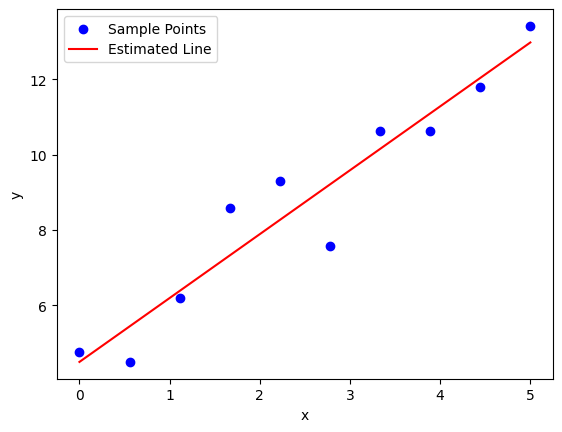

In [20]:
plt.scatter(x, y, color='blue', label='Sample Points')
plt.plot(x, a * x + b, color='red', label='Estimated Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### step 4

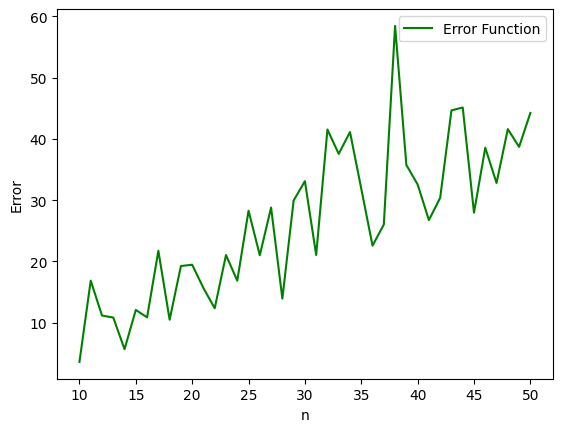

In [21]:
n_values = range(10, 51)
errors = []
for n in n_values:
    x_new = np.linspace(0, 5, num=n)
    epsilon_new = np.random.normal(0, 1, n)
    y_new = 2 * x_new + 3 + epsilon_new
    a_new, b_new = np.polyfit(x_new, y_new, 1)
    error = np.sum((a_new * x_new + b_new - y_new) ** 2)
    errors.append(error)
plt.plot(n_values, errors, color='green', label='Error Function')
plt.xlabel('n')
plt.ylabel('Error')
plt.legend()
plt.show()

### step 5

In [22]:
x_quad = np.linspace(0, 5, num=20)
y_quad = x_quad**2 + 2 * x_quad + 3 + np.random.normal(0, 1, 20)

### step 6

In [23]:
A = np.vstack([x_quad**2, x_quad, np.ones(len(x_quad))]).T
coefficients = np.linalg.lstsq(A, y_quad, rcond=None)[0]

### step 7

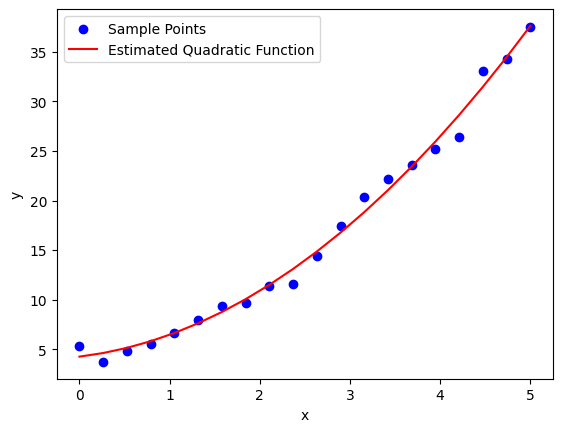

In [24]:
plt.scatter(x_quad, y_quad, color='blue', label='Sample Points')
plt.plot(x_quad, coefficients[0] * x_quad**2 + coefficients[1] * x_quad + coefficients[2], color='red', label='Estimated Quadratic Function')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Question 3 ``(35 pt.)``

A structure's various components can be represented by a single **state vector**, which changes over time due to certain processes. This changing state vector, when modeled using linear transformations at discrete intervals, forms the basis of a **discrete dynamical system**.

Starting with an initial state $X_0$, transitions to subsequent states are governed by a matrix $P$, embodying linear transformations. For instance, $X_1 = PX_0$ marks the first transition, leading to a sequence where $X_2 = P^2X_0$, $X_3 = P^3X_0$, and so forth, generalizing to $X_t = PX_{t-1}$ for each time step $t$.

This approach is particularly effective in modeling web navigation, where each webpage's visit probability at any given time is captured by the state vector $X_t$. The transition matrix $P$ specifies the likelihood of moving from one page to another, with each element $p_{ij}$ representing the probability of transitioning from page $j$ to page $i$. To ensure the model's consistency, the sum of probabilities in each column of $P$ must equal one, reflecting the comprehensive distribution of navigating from any given page to the next.

In [25]:
## IMPORTS 
import numpy as np
import math

To illustrate with a small set of pages, say $n=5$, we construct matrix $P$ adhering to the principle that all diagonal elements are $0$, emphasizing no page links back to itself immediately. Additionally, to ensure that navigation probabilities from one page to another are properly distributed, the sum of the entries in each column of $P$ must equal one. Here's how such a matrix might look for $n=5$:

$$P=
\begin{bmatrix}
0 & 0.2 & 0.3 & 0.4 & 0.1 \\
0.3 & 0 & 0.2 & 0.1 & 0.4 \\
0.2 & 0.3 & 0 & 0.2 & 0.3 \\
0.1 & 0.2 & 0.4 & 0 & 0.1 \\
0.4 & 0.3 & 0.1 & 0.3 & 0.1
\end{bmatrix}$$

This configuration ensures a balanced probability distribution for transitions between pages, making our web navigation model realistic.

For the initial state vector $X_0$, where the browser starts at page $4$, $X_0$ would be a vector with its fourth entry as one and all others as zero, representing a 100% probability of starting from page 4.

Write a function to compute the navigation probabilities to all five pages after t transition. Then use the function to calculate a new vector $X_t$, representing the probabilities that the browser is on each of the five pages after following t links from the starting page. At last apply the function on $X_0$ assuming symmetric transition probabilities and t to be 10.

In [26]:
def navigate(P, X_0, t):
    P_t = np.linalg.matrix_power(P, t)
    X_t = np.dot(P_t, X_0)
    return X_t
P = np.array([
    [0, 0.2, 0.3, 0.4, 0.1],
    [0.3, 0, 0.2, 0.1, 0.4],
    [0.2, 0.3, 0, 0.2, 0.3],
    [0.1, 0.2, 0.4, 0, 0.1],
    [0.4, 0.3, 0.1, 0.3, 0.1]
])
X_0 = np.array([0, 0, 0, 1, 0])
X_10 = navigate(P, X_0, 10)
print("The state vector after transitions:", X_10)


The state vector after transitions: [0.19180406 0.20757166 0.20330075 0.16522473 0.2320988 ]


Predicting long-term visit probabilities, represented by $X_m$ for a large $m$, reveals which pages are likely to be frequented after extensive random navigation. However, repeatedly applying transformations to achieve this is computationally intensive. Leveraging eigenvalues and eigenvectors can substantially streamline the process, significantly minimizing the computational workload.

Find eigenvalues and eigenvectors for the previously defined matrix $P$.

In [27]:
eigenvalues, eigenvectors = np.linalg.eig(P)
print("Eigenvalues of P:")
print(eigenvalues)
print("\nEigenvectors of P:")
print(eigenvectors)

Eigenvalues of P:
[ 1.        +0.j         -0.15765017+0.25793924j -0.15765017-0.25793924j
 -0.25755543+0.j         -0.32714423+0.j        ]

Eigenvectors of P:
[[-0.42636443+0.j          0.54212868+0.j          0.54212868-0.j
  -0.41107073+0.j          0.17711093+0.j        ]
 [-0.4613977 +0.j         -0.45321696-0.16110887j -0.45321696+0.16110887j
  -0.55741775+0.j         -0.82959181+0.j        ]
 [-0.45192925+0.j         -0.24724677+0.1558109j  -0.24724677-0.1558109j
  -0.03871143+0.j          0.34062401+0.j        ]
 [-0.36728128+0.j          0.21172414+0.41594989j  0.21172414-0.41594989j
   0.42750163+0.j         -0.08465115+0.j        ]
 [-0.51593599+0.j         -0.05338909-0.41065191j -0.05338909+0.41065191j
   0.57969828+0.j          0.39650803+0.j        ]]


A **Markov matrix** is characterized by its square shape, nonnegative entries, and the property that the sum of the elements in each column equals $1$. A key attribute of Markov matrices is that they always possess an eigenvalue of $1$. 

Given that matrix $P$ is designed as a Markov matrix, it naturally includes an eigenvalue of $1$. This feature allows us to express the equation $X_m = PX_{m-1}$ in a simplified form as $PX_{m-1} = 1 \times X_m$. For long-term probability predictions within $X_m$, identifying an eigenvector associated with the eigenvalue $1$ is crucial. This is because it leads to the simplified equation $PX = X$, facilitating the determination of steady-state probabilities without extensive computations.

After doing so check if your answer satisfies the equation with proper code. (use np.isclose)

In [28]:
index_of_eigenvalue_1 = np.argmin(np.abs(eigenvalues - 1))
steady_state_vector = eigenvectors[:, index_of_eigenvalue_1]
X = steady_state_vector
PX = np.dot(P, X)
is_close = np.isclose(PX, X)
print("Steady-state vector (X):", X)
print("Result of PX = X (within tolerance):", is_close)


Steady-state vector (X): [-0.42636443+0.j -0.4613977 +0.j -0.45192925+0.j -0.36728128+0.j
 -0.51593599+0.j]
Result of PX = X (within tolerance): [ True  True  True  True  True]


In [29]:
X_abs = np.abs(X.real)
X_normalized = X_abs / np.sum(X_abs)
print("Normalized steady-state vector (X):", X_normalized)

Normalized steady-state vector (X): [0.19180475 0.20756485 0.20330536 0.16522554 0.2320995 ]


Explain the above results : ## HERE



## Explanation:
### Steady-State Vector
Given a Markov matrix \(P\), we can express the equation \(X_m = PX_{m-1}\) in a simplified form as \(PX_{m-1} = 1 \times X_m\). For long-term probability predictions within \(X_m\), identifying an eigenvector associated with the eigenvalue 1 is crucial. This leads to the simplified equation \(PX = X\), which facilitates the determination of steady-state probabilities without extensive computations.

### Results
1. **Steady-State Vector (X):**
   - The steady-state vector represents the long-term probabilities of being on each of the five pages after many transitions.
   - It is obtained by finding the eigenvector corresponding to the eigenvalue 1.
   - The negative signs in the vector are likely due to scaling, but probabilities cannot be negative.
   - To correct this, take the absolute value of the real part of the vector and normalize it.

2. **Result of \(PX = X\) (within tolerance):**
   - The True values indicate that when we multiply the transition matrix \(P\) by the steady-state vector \(X\), we get the vector \(X\) back (within a numerical tolerance).
   - This confirms that \(X\) is indeed the steady-state vector for the Markov matrix \(P\).

### Adjustments
To obtain valid probabilities:
1. Take the absolute value of the real part of the vector.
2. Normalize the vector so that its components sum to 1.

---


Make sure that your vector satisfies the probability vector criteria.

In [31]:
### START CODE HERE ###
X_inf = X_normalized

### END CODE HERE ###

print("Probabilities being at each of the pages:\n" + str(X_inf))

Probabilities being at each of the pages:
[0.19180475 0.20756485 0.20330536 0.16522554 0.2320995 ]


In a more realistic model of the web, some pages may not have outbound links (dangling nodes), and users may sometimes choose to navigate to a random page rather than following an outbound link. The Google PageRank algorithm introduces a damping factor to model this behavior, making the Markov process more reflective of real-world web navigation.

Dangling nodes are pages without outbound links. These nodes would lead to columns of zeros in the transition matrix, which is problematic for calculating the steady state. To address this, distribute the probability mass of dangling nodes equally among all pages.

First identify dangling nodes then djust the transition matrix $P$ by redistributing the dangling nodes' probability mass equally across all pages, ensuring every column sums to 1.

In [32]:
P_original = np.array([
    [0, 0, 0, 0, 0],
    [1, 0, 0.5, 0, 0],
    [0, 0, 0, 0.5, 0],
    [0, 1, 0.5, 0, 0],
    [0, 0, 0, 0.5, 0]
])
dangling_node = 4 
num_pages = P_original.shape[0]
P_adjusted = P_original.copy()
P_adjusted[:, dangling_node] = 1 / num_pages
P_adjusted /= np.sum(P_adjusted, axis=0)
print("Adjusted transition matrix P:")
print(P_adjusted)

Adjusted transition matrix P:
[[0.  0.  0.  0.  0.2]
 [1.  0.  0.5 0.  0.2]
 [0.  0.  0.  0.5 0.2]
 [0.  1.  0.5 0.  0.2]
 [0.  0.  0.  0.5 0.2]]


The damping factor models the behavior of web surfers who occasionally jump to a random page instead of following outbound links. This factor, usually set to 0.85, balances between following links ($P$) and jumping at random ($\frac{1}{n}$, where \(n\) is the number of pages).

Apply the damping factor $d$ to the transition matrix $P$ to get $P' = dP + \frac{1-d}{n}E$, where $E$ is an $n \times n$ matrix with all elements equal to $\frac{1}{n}$.

In [33]:
damping_factor = 0.85
n = P_adjusted.shape[0]
E = np.full((n, n), 1 / n)
P_prime = damping_factor * P_adjusted + (1 - damping_factor) * E
print("P' matrix:")
print(P_prime)

P' matrix:
[[0.03  0.03  0.03  0.03  0.2  ]
 [0.88  0.03  0.455 0.03  0.2  ]
 [0.03  0.03  0.03  0.455 0.2  ]
 [0.03  0.88  0.455 0.03  0.2  ]
 [0.03  0.03  0.03  0.455 0.2  ]]


The steady state distribution with the damping factor reflects a more realistic scenario of web page navigation. Finding this distribution involves solving for the principal Eigenvector of the modified transition matrix $P'$.

Use linear algebra techniques to compute the Eigenvector corresponding to the Eigenvalue of 1 for the modified matrix $P'$.
Normalize this Eigenvector to represent the steady-state distribution of page ranks.

In [34]:
eigenvalues, eigenvectors = np.linalg.eig(P_prime)
index = np.argmin(np.abs(eigenvalues - 1))
principal_eigenvector = np.abs(eigenvectors[:, index])
normalized_eigenvector = principal_eigenvector / np.sum(principal_eigenvector)
print("The normalized steady-state distribution of page ranks is:")
print(normalized_eigenvector)

The normalized steady-state distribution of page ranks is:
[0.06444052 0.20531626 0.20259129 0.32506064 0.20259129]


Real-world web link structures can be vast, resulting in large, sparse transition matrices. Direct computation methods become impractical, necessitating efficient computational strategies.

Represent the transition matrix $P$ and modifications using sparse matrix techniques to handle large datasets. Then implement an iterative method, such as the power iteration algorithm, to find the principal Eigenvector efficiently.

In [35]:
def power_iteration(P, max_iterations=1000, tol=1e-6):
    n = P.shape[0]
    x = np.ones(n) / n  # Initial guess vector
    for _ in range(max_iterations):
        x_new = P.dot(x)
        x_new /= np.linalg.norm(x_new, 1)  # Normalize
        if np.linalg.norm(x_new - x) < tol:
            break
        x = x_new
    return x
P_original = np.array([
    [0, 0, 0, 0, 0],
    [1, 0, 0.5, 0, 0],
    [0, 0, 0, 0.5, 0],
    [0, 1, 0.5, 0, 0],
    [0, 0, 0, 0.5, 0]
])
principal_eigenvector = power_iteration(P_original)
print("Principal Eigenvector (Steady-State Distribution):")
print(principal_eigenvector)

Principal Eigenvector (Steady-State Distribution):
[0.         0.15729758 0.23931029 0.36408183 0.23931029]


Given the transition matrix below, complete the function pagerank to handel the normalization of the matrix, apply damping and find its corresponding steady state vector.

In [36]:
def pageRank(X):
    damping_factor=0.85
    max_iterations=100
    tol=1e-6
    n = len(X)
    M = np.array(X, dtype=float)
    column_sums = M.sum(axis=0)
    column_sums[column_sums == 0] = 1
    M /= column_sums
    E = np.ones((n, n)) / n 
    M = damping_factor * M + ((1 - damping_factor) * E)
    steadystatevector = np.ones(n) / n
    for i in range(max_iterations):
        next_steadystatevector = M @ steadystatevector
        steadystatevector = next_steadystatevector
    steadystatevector /= steadystatevector.sum()
    return steadystatevector

matrix2 = [ [0, 0, 1, 0, 0, 0, 0, 0],
            [1, 0, 0, 1, 0, 0, 0, 0],
            [1, 0, 0, 0, 0, 0, 0, 0],
            [1, 1, 1, 0, 0, 0, 0, 0],
            [0, 1, 0, 0, 0, 1, 0, 0],
            [0, 0, 0, 0, 0, 0, 1, 1],
            [0, 0, 0, 1, 1, 0, 0, 1],
            [0, 0, 0, 0, 0, 1, 0, 0] ]
print("steady state vector: ")
print(pageRank(matrix2))

steady state vector: 
[0.0303766  0.05360745 0.0273567  0.06176647 0.16206337 0.28360049
 0.24194871 0.13928021]


## Question 4 ``(35 pt.)``

Auto-regressive (AR) models are fundamental in signal processing for modeling time series data. An AR model predicts future values based on a linear combination of past values. Mathematically, it's represented as 
$$
\hat{y}[t] = \sum_{i=1}^{p} a_i y[t-i]
$$, 
where $\hat{y}[t]$ is the predicted value at time $t$, $y[t-i]$ are the past values, and $a_i$ are the coefficients that need to be determined. Cross-regressive models extend this concept by modeling the relationship between two different time series, predicting values of one series using past values of another.

Load the data, qbo.txt. This consists of three data streams from temperature readings associated with the Quasi-Biennial Oscillation (QBO), sampled at one month intervals. These are shown below.


<!-- ![alt text](QBO.png) -->

<div style="text-align: center;">
    <img src="QBO.png" alt="alt text" width="600" height="500">
</div>

In [37]:
## IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import cv2

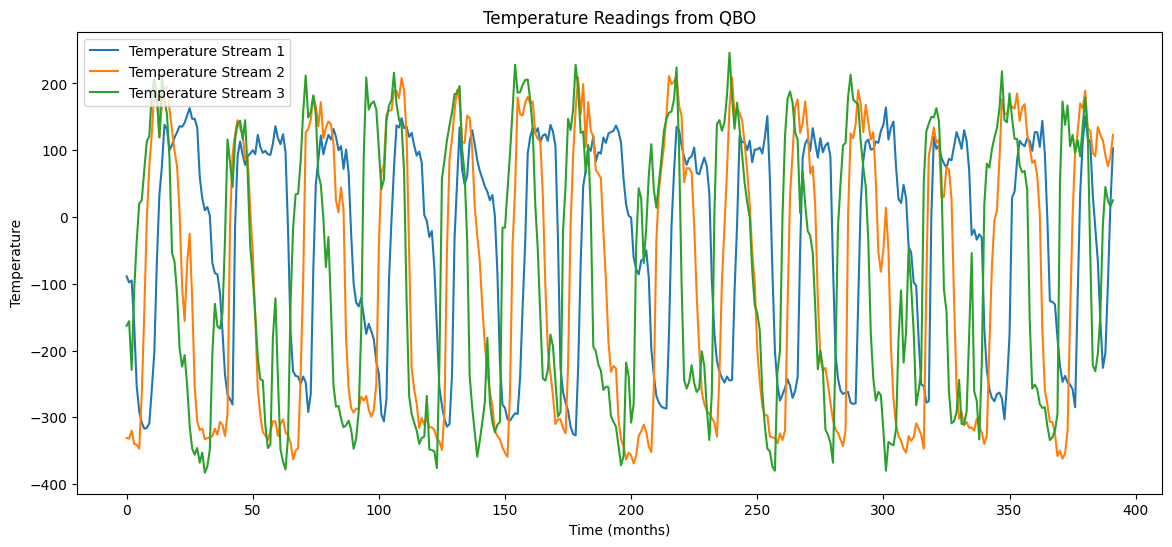

In [38]:
data = np.loadtxt('qbo.txt')
temperature_1 = data[:, 0] 
temperature_2 = data[:, 1]  
temperature_3 = data[:, 2]  

plt.figure(figsize=(14, 6))
plt.plot(temperature_1, label='Temperature Stream 1')
plt.plot(temperature_2, label='Temperature Stream 2')
plt.plot(temperature_3, label='Temperature Stream 3')
plt.title('Temperature Readings from QBO')
plt.xlabel('Time (months)')
plt.ylabel('Temperature')
plt.legend()
plt.show()


Formulate the AR model for the first time series. Define the order of the model $p$, which represents how many past values will be considered to predict the current value. The choice of $p$ can significantly affect model performance.

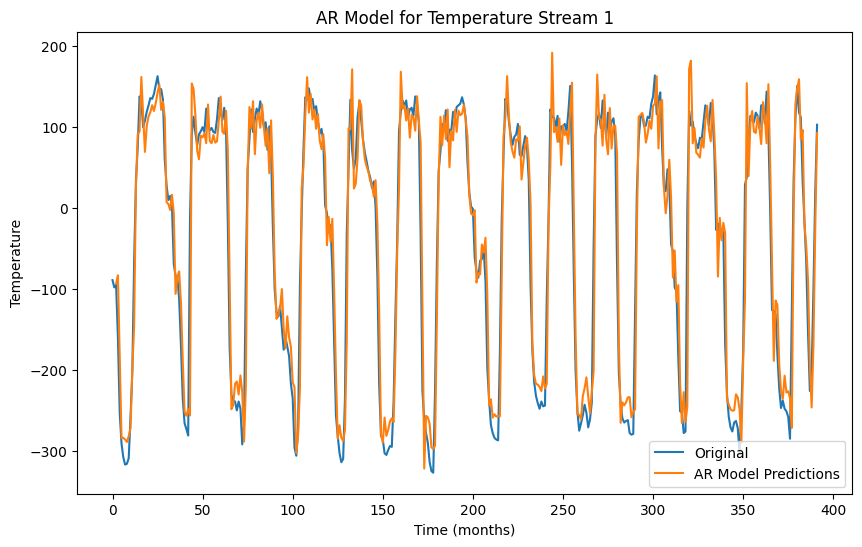

Coefficients: [-0.62363475  1.51763441]


In [39]:
p = 2 
X = np.array([temperature_1[i-p:i] for i in range(p, len(temperature_1))])
y = temperature_1[p:]
coefficients = np.linalg.lstsq(X, y, rcond=None)[0]
plt.figure(figsize=(10, 6))
plt.plot(temperature_1, label='Original')
predictions = np.dot(X, coefficients)
plt.plot(range(p, len(temperature_1)), predictions, label='AR Model Predictions')
plt.title('AR Model for Temperature Stream 1')
plt.xlabel('Time (months)')
plt.ylabel('Temperature')
plt.legend()
plt.show()
print('Coefficients:', coefficients)

Construct an embedding matrix from lagged versions of the data series. This matrix, often denoted as $M$, captures the structure of dependencies in past values. Use the pseudo-inverse of $M$ to solve for the coefficients $a_i$ that minimize the prediction error in a least squares sense.

In [40]:
X = np.array([temperature_1[i-p:i] for i in range(p, len(temperature_1))])
y = temperature_1[p:]
M = np.vstack((np.ones(len(y)), X.T)).T
M_pseudo_inv = np.linalg.pinv(M)
coefficients = np.dot(M_pseudo_inv, y)
print('Coefficients:', coefficients)

Coefficients: [-3.45675199 -0.62623275  1.51557113]


Assess the fitted model by comparing the predicted values against actual values using metrics such as the Mean Squared Error (MSE) or the coefficient of determination ($R^2$).

In [41]:
predicted_values = np.dot(X, coefficients[1:])
mse = np.mean((y - predicted_values) ** 2)
total_variance = np.var(y)
r_squared = 1 - (mse / total_variance)
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R^2): {r_squared:.4f}')

Mean Squared Error (MSE): 2053.2896
R-squared (R^2): 0.9187


**Cross-regression**  - Modify the embedding matrix method, so that p

$$
\hat{y}[t] = \sum_{i=1}^{p} a_i z[t-i]
$$, 

in which y is being modelled by observing another timeseries, z. The coefficients of this model now describe the cross- regression i.e. how the past of z effects the present value of y. We can look at the magnitude of the coefficients as well as the predictions of y to give an idea about the information that ‘flows’ from z to y. Do any of the timeseries have strong interactions? If so, is there any indication of which one is driving which?

In [42]:
y = data[:, 0]  
z = data[:, 1]
Z_lagged = np.array([z[i-p:i] for i in range(p, len(z))])
y = y[p:]
M_z = np.vstack((np.ones(len(Z_lagged)), Z_lagged.T)).T
M_z_pseudo_inv = np.linalg.pinv(M_z)
coefficients = np.dot(M_z_pseudo_inv, y)
predicted_y = np.dot(M_z, coefficients)
mse = np.mean((y - predicted_y) ** 2)
r_squared = 1 - (mse / np.var(y))
print('Coefficients:', coefficients)
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared (R^2): {r_squared:.4f}')


Coefficients: [-2.25473002  1.43107913 -1.09343097]
Mean Squared Error (MSE): 13469.6564
R-squared (R^2): 0.4668


Use the cv2 package to load a grayscale version of the cameraman image with a relatively low resolution, 128 by 128, then display the image using matplotlib.pyplot

Do not forget to convert RGB to gray to reduce the 3 color channels to one

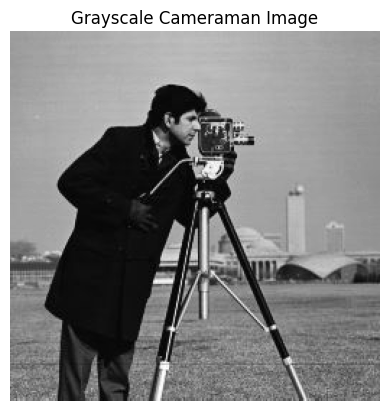

In [43]:
original_image = cv2.imread('cameraman.jpg')
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.axis('off')  # Hide axes
plt.title('Grayscale Cameraman Image')
plt.show()

In [44]:
from pygsp import graphs, filters, plotting

In [45]:
### do not edit this cell 
G = graphs.Grid2d(128,128)
L = G.L

Flatten the grayscale image into a vector. Apply the filter by multiplying $L$ with the flattened image vector: $x_{filtered} = Lx$. Reshape $x_{filtered}$ back to the original image dimensions.

Display the filtered image.

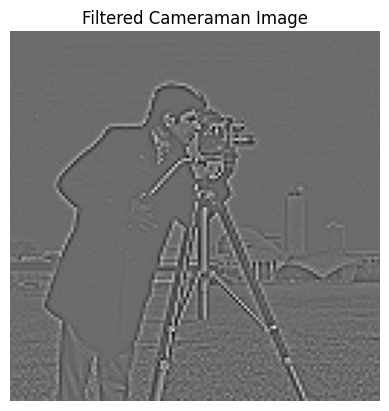

In [46]:
gray_image_resized = cv2.resize(gray_image, (128, 128))
flattened_image = gray_image_resized.flatten()
G = graphs.Grid2d(N1=128, N2=128)
L = G.L
filtered_image_vector = L @ flattened_image
filtered_image = filtered_image_vector.reshape(128, 128)
plt.imshow(filtered_image, cmap='gray')
plt.axis('off') 
plt.title('Filtered Cameraman Image')
plt.show()


Formulate the inverse problem as a least squares problem. Then solve the inverse problem to get the reconstructed image. Finally display the original, filtered and the reconstructed images in a subplot. Use $\textbf{lsqr}$ from $\textbf{scipy.sparse.linalg}$ to solve least squares knowing that L is in sparse format. 

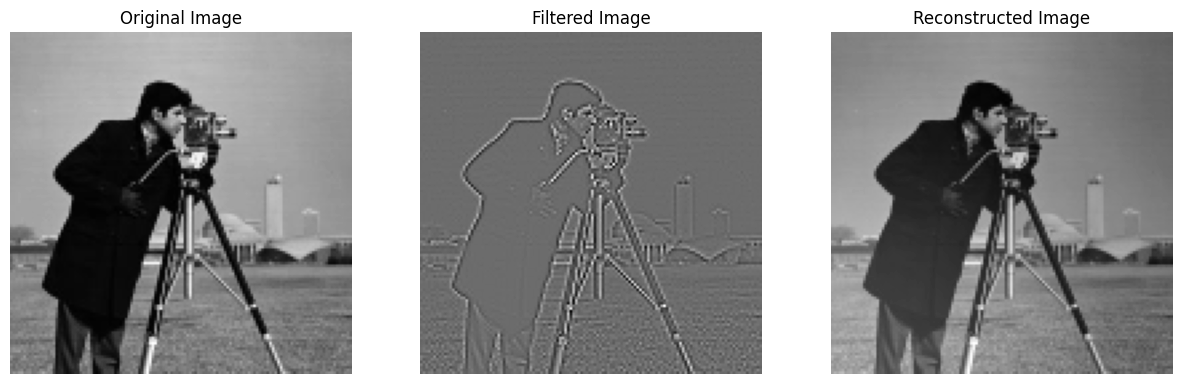

In [47]:
reconstructed_image_vector, istop, iternum, r1norm = lsqr(L, filtered_image_vector)[:4]
reconstructed_image = reconstructed_image_vector.reshape(128, 128)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(gray_image_resized, cmap='gray')
axs[0].axis('off')
axs[0].set_title('Original Image')
axs[1].imshow(filtered_image_vector.reshape(128, 128), cmap='gray')
axs[1].axis('off')
axs[1].set_title('Filtered Image')
axs[2].imshow(reconstructed_image, cmap='gray')
axs[2].axis('off')
axs[2].set_title('Reconstructed Image')
plt.show()